In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import os
import logging
from functools import partial

import numpy as np
import jax
import jax.numpy as jnp
from jax import random
import wandb
import matplotlib
import matplotlib.pyplot as plt

import src.data
from src.models import make_Hard_OvR_Ens_loss as make_loss
from src.models import make_Hard_OvR_Ens_toy_plots as make_plots
from src.data import NumpyLoader
from src.utils.training import setup_training, train_loop
from experiments.configs.spirals_hard_ovr_classification import get_config

In [12]:
os.environ['WANDB_NOTEBOOK_NAME'] = 'train_hard_ivr_classifier_spirals.ipynb'
# ^ W&B doesn't know how to handle VS Code notebooks.

wandb.login()

True

In [13]:
rng = random.PRNGKey(0)

In [14]:
config = get_config()

In [15]:
data_gen_fn = getattr(src.data, config.dataset_name)
train_dataset, test_dataset, val_dataset = data_gen_fn(**config.dataset.to_dict())
train_loader = NumpyLoader(train_dataset, config.batch_size)
val_loader = NumpyLoader(val_dataset, config.batch_size)
test_loader = NumpyLoader(test_dataset, config.batch_size)

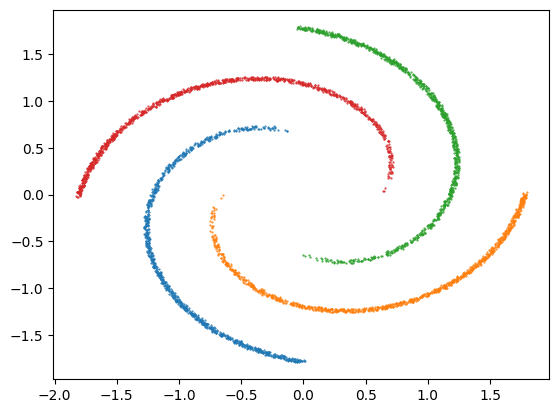

In [16]:
X_train, y_train = zip(*train_loader.dataset)
X_train, y_train = jnp.array(X_train), jnp.array(y_train)

for i in range(config.n_classes):
    idxs = (y_train == i)

    plt.plot(X_train[idxs, 0], X_train[idxs, 1], '.', c=f'C{i}', alpha=1, ms=1)

In [17]:
setup_rng, rng = random.split(rng)
init_x = train_dataset[0][0]
init_y = train_dataset[0][1]

model, state = setup_training(config, setup_rng, init_x, init_y)

+---------------------------------------------+------------+--------+-----------+--------+
| Name                                        | Shape      | Size   | Mean      | Std    |
+---------------------------------------------+------------+--------+-----------+--------+
| batch_stats/nets_0/layer_0/BatchNorm_0/mean | (100,)     | 100    | 0.0       | 0.0    |
| batch_stats/nets_0/layer_0/BatchNorm_0/var  | (100,)     | 100    | 1.0       | 0.0    |
| batch_stats/nets_0/layer_1/BatchNorm_0/mean | (100,)     | 100    | 0.0       | 0.0    |
| batch_stats/nets_0/layer_1/BatchNorm_0/var  | (100,)     | 100    | 1.0       | 0.0    |
| batch_stats/nets_0/layer_2/BatchNorm_0/mean | (100,)     | 100    | 0.0       | 0.0    |
| batch_stats/nets_0/layer_2/BatchNorm_0/var  | (100,)     | 100    | 1.0       | 0.0    |
| batch_stats/nets_0/layer_3/BatchNorm_0/mean | (100,)     | 100    | 0.0       | 0.0    |
| batch_stats/nets_0/layer_3/BatchNorm_0/var  | (100,)     | 100    | 1.0       | 0.0    |

2022-10-07 11:29:00.622186: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-07 11:29:01.262468: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-10-07 11:29:01.262541: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-10-07 11:29:01.262550: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


  0%|          | 0/201 [00:00<?, ?it/s]

epoch:   1 - train loss: 1.30199, val loss: 1.34790, train err: 0.6486, val err: 0.7167, β: 1.0702, lr: 0.00010
epoch:   2 - train loss: 0.83644, val loss: 1.01062, train err: 0.3157, val err: 0.5854, β: 1.1449, lr: 0.00010
epoch:   3 - train loss: 0.55384, val loss: 0.64922, train err: 0.1588, val err: 0.3271, β: 1.2195, lr: 0.00010
epoch:   4 - train loss: 0.40860, val loss: 0.40127, train err: 0.1181, val err: 0.1604, β: 1.2941, lr: 0.00010
epoch:   5 - train loss: 0.31894, val loss: 0.26838, train err: 0.0891, val err: 0.1083, β: 1.3687, lr: 0.00010
epoch:   6 - train loss: 0.25824, val loss: 0.19963, train err: 0.0734, val err: 0.0417, β: 1.4434, lr: 0.00010
epoch:   7 - train loss: 0.21255, val loss: 0.16049, train err: 0.0618, val err: 0.0333, β: 1.5180, lr: 0.00010
epoch:   8 - train loss: 0.17593, val loss: 0.12998, train err: 0.0477, val err: 0.0396, β: 1.5926, lr: 0.00010
epoch:   9 - train loss: 0.14801, val loss: 0.10709, train err: 0.0435, val err: 0.0292, β: 1.6673, lr: 

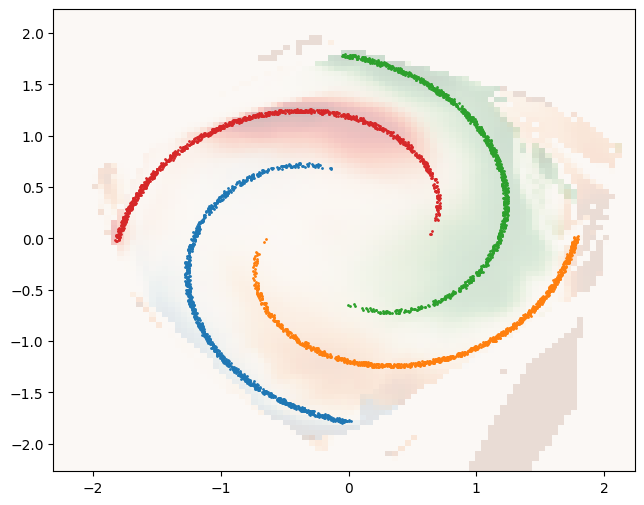

epoch:  11 - train loss: 0.10376, val loss: 0.07257, train err: 0.0347, val err: 0.0125, β: 1.8165, lr: 0.00010
epoch:  12 - train loss: 0.08712, val loss: 0.05937, train err: 0.0338, val err: 0.0083, β: 1.8911, lr: 0.00010
epoch:  13 - train loss: 0.07342, val loss: 0.04948, train err: 0.0292, val err: 0.0042, β: 1.9658, lr: 0.00010
epoch:  14 - train loss: 0.06206, val loss: 0.04118, train err: 0.0264, val err: 0.0042, β: 2.0404, lr: 0.00010
epoch:  15 - train loss: 0.05246, val loss: 0.03439, train err: 0.0248, val err: 0.0042, β: 2.1150, lr: 0.00010
epoch:  16 - train loss: 0.04438, val loss: 0.02882, train err: 0.0229, val err: 0.0042, β: 2.1896, lr: 0.00010
epoch:  17 - train loss: 0.03765, val loss: 0.02409, train err: 0.0215, val err: 0.0063, β: 2.2643, lr: 0.00010
epoch:  18 - train loss: 0.03209, val loss: 0.02013, train err: 0.0194, val err: 0.0042, β: 2.3389, lr: 0.00010
epoch:  19 - train loss: 0.02746, val loss: 0.01703, train err: 0.0197, val err: 0.0042, β: 2.4135, lr: 

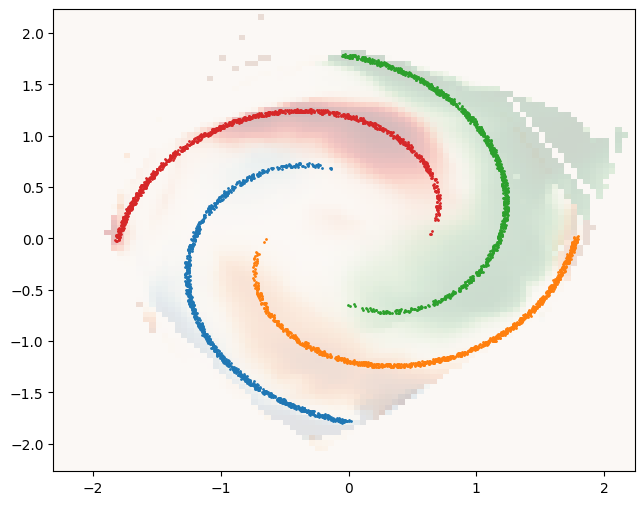

epoch:  21 - train loss: 0.02038, val loss: 0.01230, train err: 0.0208, val err: 0.0083, β: 2.5628, lr: 0.00010
epoch:  22 - train loss: 0.01767, val loss: 0.01051, train err: 0.0208, val err: 0.0083, β: 2.6374, lr: 0.00010
epoch:  23 - train loss: 0.01535, val loss: 0.00904, train err: 0.0206, val err: 0.0063, β: 2.7120, lr: 0.00010
epoch:  24 - train loss: 0.01341, val loss: 0.00784, train err: 0.0213, val err: 0.0104, β: 2.7867, lr: 0.00010
epoch:  25 - train loss: 0.01178, val loss: 0.00679, train err: 0.0218, val err: 0.0063, β: 2.8613, lr: 0.00010
epoch:  26 - train loss: 0.01037, val loss: 0.00591, train err: 0.0236, val err: 0.0042, β: 2.9359, lr: 0.00010
epoch:  27 - train loss: 0.00916, val loss: 0.00516, train err: 0.0241, val err: 0.0063, β: 3.0105, lr: 0.00010
epoch:  28 - train loss: 0.00811, val loss: 0.00453, train err: 0.0236, val err: 0.0063, β: 3.0852, lr: 0.00010
epoch:  29 - train loss: 0.00722, val loss: 0.00398, train err: 0.0238, val err: 0.0063, β: 3.1598, lr: 

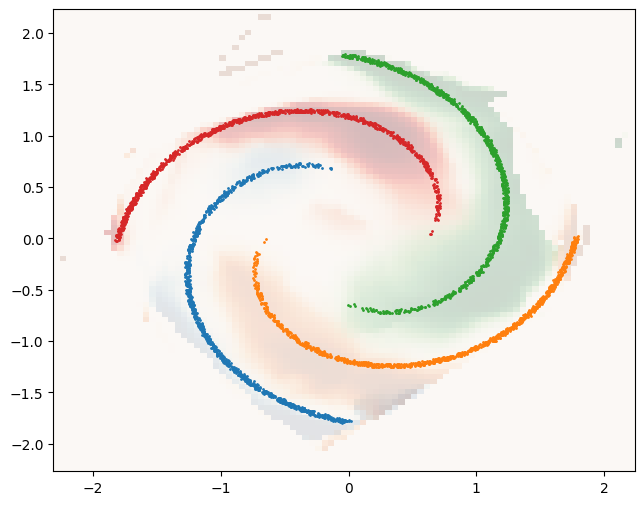

epoch:  31 - train loss: 0.00576, val loss: 0.00310, train err: 0.0255, val err: 0.0063, β: 3.3090, lr: 0.00010
epoch:  32 - train loss: 0.00517, val loss: 0.00275, train err: 0.0264, val err: 0.0063, β: 3.3837, lr: 0.00010
epoch:  33 - train loss: 0.00466, val loss: 0.00245, train err: 0.0264, val err: 0.0063, β: 3.4583, lr: 0.00010
epoch:  34 - train loss: 0.00420, val loss: 0.00219, train err: 0.0271, val err: 0.0063, β: 3.5329, lr: 0.00010
epoch:  35 - train loss: 0.00380, val loss: 0.00196, train err: 0.0278, val err: 0.0063, β: 3.6076, lr: 0.00010
epoch:  36 - train loss: 0.00346, val loss: 0.00176, train err: 0.0287, val err: 0.0063, β: 3.6822, lr: 0.00010
epoch:  37 - train loss: 0.00315, val loss: 0.00159, train err: 0.0285, val err: 0.0063, β: 3.7568, lr: 0.00010
epoch:  38 - train loss: 0.00288, val loss: 0.00144, train err: 0.0278, val err: 0.0063, β: 3.8314, lr: 0.00010
epoch:  39 - train loss: 0.00264, val loss: 0.00130, train err: 0.0278, val err: 0.0063, β: 3.9061, lr: 

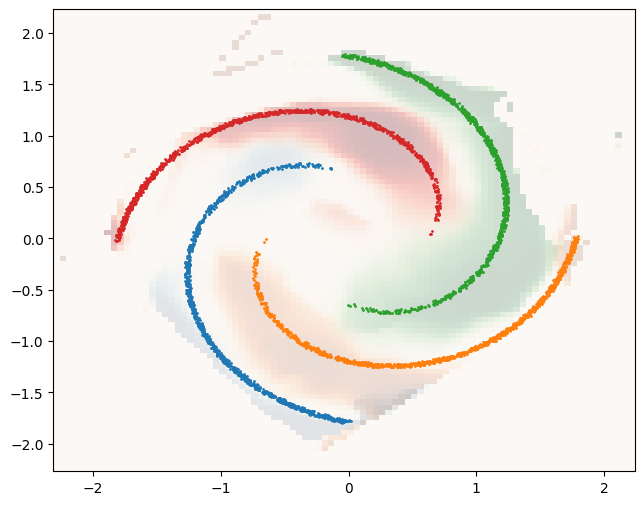

epoch:  41 - train loss: 0.00224, val loss: 0.00108, train err: 0.0273, val err: 0.0063, β: 4.0553, lr: 0.00010
epoch:  42 - train loss: 0.00207, val loss: 0.00099, train err: 0.0275, val err: 0.0042, β: 4.1299, lr: 0.00010
epoch:  43 - train loss: 0.00192, val loss: 0.00091, train err: 0.0280, val err: 0.0042, β: 4.2046, lr: 0.00010
epoch:  44 - train loss: 0.00178, val loss: 0.00084, train err: 0.0287, val err: 0.0042, β: 4.2792, lr: 0.00010
epoch:  45 - train loss: 0.00166, val loss: 0.00078, train err: 0.0289, val err: 0.0042, β: 4.3538, lr: 0.00010
epoch:  46 - train loss: 0.00155, val loss: 0.00072, train err: 0.0287, val err: 0.0042, β: 4.4284, lr: 0.00010
epoch:  47 - train loss: 0.00144, val loss: 0.00067, train err: 0.0289, val err: 0.0042, β: 4.5031, lr: 0.00010
epoch:  48 - train loss: 0.00135, val loss: 0.00063, train err: 0.0287, val err: 0.0042, β: 4.5777, lr: 0.00010
epoch:  49 - train loss: 0.00127, val loss: 0.00059, train err: 0.0287, val err: 0.0042, β: 4.6523, lr: 

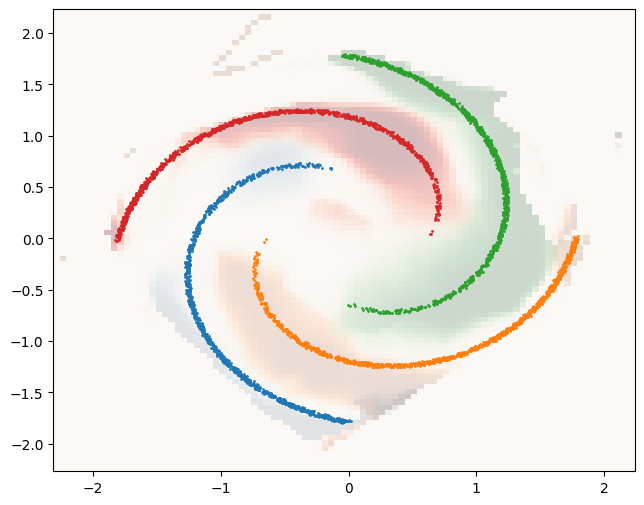

epoch:  51 - train loss: 0.00113, val loss: 0.00052, train err: 0.0292, val err: 0.0042, β: 4.8016, lr: 0.00010
epoch:  52 - train loss: 0.00107, val loss: 0.00050, train err: 0.0285, val err: 0.0042, β: 4.8762, lr: 0.00010
epoch:  53 - train loss: 0.00101, val loss: 0.00047, train err: 0.0275, val err: 0.0021, β: 4.9508, lr: 0.00010
epoch:  54 - train loss: 0.00096, val loss: 0.00045, train err: 0.0269, val err: 0.0021, β: 5.0255, lr: 0.00010
epoch:  55 - train loss: 0.00092, val loss: 0.00043, train err: 0.0269, val err: 0.0021, β: 5.1001, lr: 0.00010
epoch:  56 - train loss: 0.00087, val loss: 0.00041, train err: 0.0266, val err: 0.0021, β: 5.1747, lr: 0.00010
epoch:  57 - train loss: 0.00083, val loss: 0.00039, train err: 0.0262, val err: 0.0021, β: 5.2493, lr: 0.00010
epoch:  58 - train loss: 0.00080, val loss: 0.00037, train err: 0.0262, val err: 0.0021, β: 5.3240, lr: 0.00010
epoch:  59 - train loss: 0.00076, val loss: 0.00035, train err: 0.0257, val err: 0.0021, β: 5.3986, lr: 

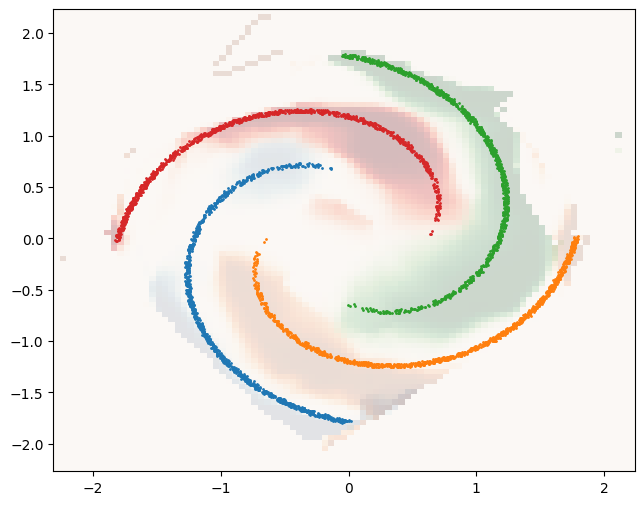

epoch:  61 - train loss: 0.00070, val loss: 0.00033, train err: 0.0248, val err: 0.0021, β: 5.5478, lr: 0.00010
epoch:  62 - train loss: 0.00068, val loss: 0.00031, train err: 0.0238, val err: 0.0021, β: 5.6225, lr: 0.00010
epoch:  63 - train loss: 0.00065, val loss: 0.00030, train err: 0.0225, val err: 0.0021, β: 5.6971, lr: 0.00010
epoch:  64 - train loss: 0.00063, val loss: 0.00029, train err: 0.0218, val err: 0.0021, β: 5.7717, lr: 0.00010
epoch:  65 - train loss: 0.00061, val loss: 0.00028, train err: 0.0215, val err: 0.0021, β: 5.8464, lr: 0.00010
epoch:  66 - train loss: 0.00059, val loss: 0.00027, train err: 0.0208, val err: 0.0021, β: 5.9210, lr: 0.00010
epoch:  67 - train loss: 0.00057, val loss: 0.00026, train err: 0.0208, val err: 0.0021, β: 5.9956, lr: 0.00010
epoch:  68 - train loss: 0.00055, val loss: 0.00025, train err: 0.0204, val err: 0.0021, β: 6.0702, lr: 0.00010
epoch:  69 - train loss: 0.00053, val loss: 0.00025, train err: 0.0204, val err: 0.0021, β: 6.1449, lr: 

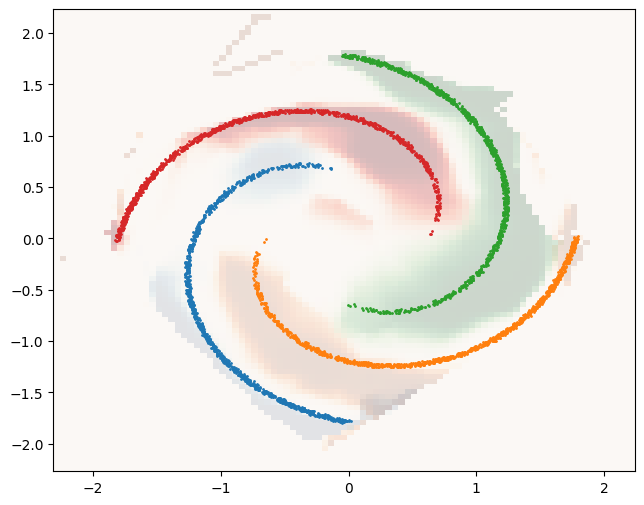

epoch:  71 - train loss: 0.00050, val loss: 0.00024, train err: 0.0190, val err: 0.0021, β: 6.2941, lr: 0.00010
epoch:  72 - train loss: 0.00048, val loss: 0.00023, train err: 0.0185, val err: 0.0021, β: 6.3687, lr: 0.00010
epoch:  73 - train loss: 0.00047, val loss: 0.00022, train err: 0.0181, val err: 0.0021, β: 6.4434, lr: 0.00010
epoch:  74 - train loss: 0.00046, val loss: 0.00022, train err: 0.0181, val err: 0.0000, β: 6.5180, lr: 0.00010
epoch:  75 - train loss: 0.00044, val loss: 0.00021, train err: 0.0176, val err: 0.0000, β: 6.5926, lr: 0.00010
epoch:  76 - train loss: 0.00043, val loss: 0.00021, train err: 0.0171, val err: 0.0000, β: 6.6673, lr: 0.00010
epoch:  77 - train loss: 0.00042, val loss: 0.00020, train err: 0.0164, val err: 0.0000, β: 6.7419, lr: 0.00010
epoch:  78 - train loss: 0.00041, val loss: 0.00020, train err: 0.0157, val err: 0.0000, β: 6.8165, lr: 0.00010
epoch:  79 - train loss: 0.00040, val loss: 0.00019, train err: 0.0153, val err: 0.0000, β: 6.8911, lr: 

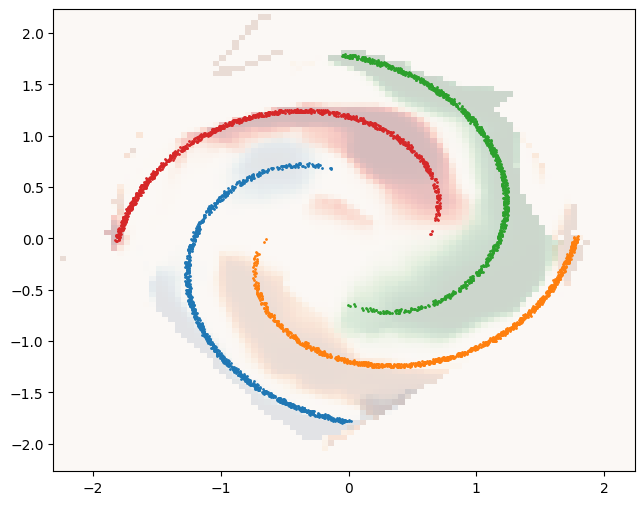

epoch:  81 - train loss: 0.00038, val loss: 0.00018, train err: 0.0150, val err: 0.0000, β: 7.0404, lr: 0.00010
epoch:  82 - train loss: 0.00038, val loss: 0.00018, train err: 0.0150, val err: 0.0000, β: 7.1150, lr: 0.00010
epoch:  83 - train loss: 0.00037, val loss: 0.00018, train err: 0.0141, val err: 0.0000, β: 7.1896, lr: 0.00010
epoch:  84 - train loss: 0.00036, val loss: 0.00017, train err: 0.0134, val err: 0.0000, β: 7.2643, lr: 0.00010
epoch:  85 - train loss: 0.00036, val loss: 0.00017, train err: 0.0132, val err: 0.0000, β: 7.3389, lr: 0.00010
epoch:  86 - train loss: 0.00035, val loss: 0.00017, train err: 0.0132, val err: 0.0000, β: 7.4135, lr: 0.00010
epoch:  87 - train loss: 0.00034, val loss: 0.00016, train err: 0.0130, val err: 0.0000, β: 7.4881, lr: 0.00010
epoch:  88 - train loss: 0.00034, val loss: 0.00016, train err: 0.0123, val err: 0.0000, β: 7.5628, lr: 0.00010
epoch:  89 - train loss: 0.00033, val loss: 0.00016, train err: 0.0116, val err: 0.0000, β: 7.6374, lr: 

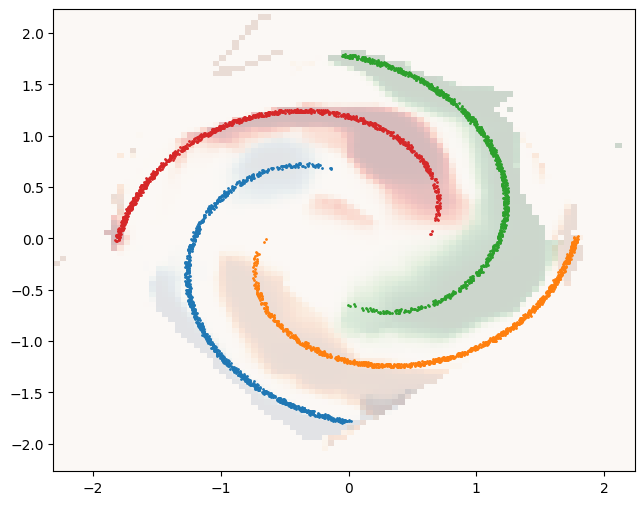

epoch:  91 - train loss: 0.00032, val loss: 0.00015, train err: 0.0111, val err: 0.0000, β: 7.7867, lr: 0.00010
epoch:  92 - train loss: 0.00032, val loss: 0.00015, train err: 0.0111, val err: 0.0000, β: 7.8613, lr: 0.00010
epoch:  93 - train loss: 0.00031, val loss: 0.00015, train err: 0.0111, val err: 0.0000, β: 7.9359, lr: 0.00010
epoch:  94 - train loss: 0.00031, val loss: 0.00014, train err: 0.0111, val err: 0.0000, β: 8.0105, lr: 0.00010
epoch:  95 - train loss: 0.00030, val loss: 0.00014, train err: 0.0111, val err: 0.0000, β: 8.0852, lr: 0.00010
epoch:  96 - train loss: 0.00030, val loss: 0.00014, train err: 0.0104, val err: 0.0000, β: 8.1598, lr: 0.00010
epoch:  97 - train loss: 0.00029, val loss: 0.00014, train err: 0.0097, val err: 0.0000, β: 8.2344, lr: 0.00010
epoch:  98 - train loss: 0.00029, val loss: 0.00013, train err: 0.0097, val err: 0.0000, β: 8.3090, lr: 0.00010
epoch:  99 - train loss: 0.00028, val loss: 0.00013, train err: 0.0090, val err: 0.0000, β: 8.3837, lr: 

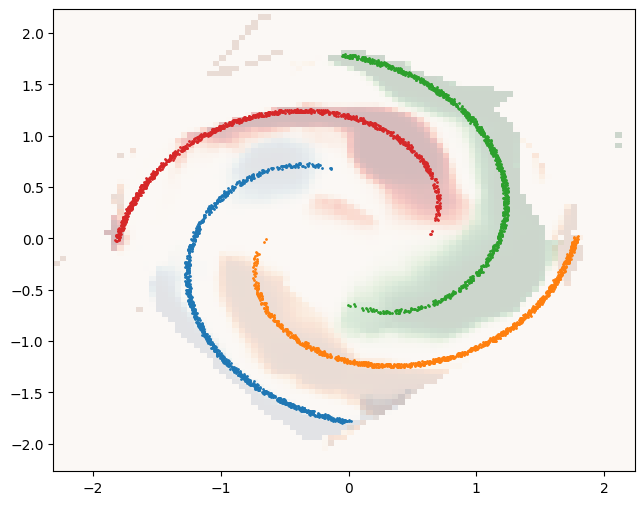

epoch: 101 - train loss: 0.00027, val loss: 0.00013, train err: 0.0086, val err: 0.0000, β: 8.5329, lr: 0.00010
epoch: 102 - train loss: 0.00027, val loss: 0.00013, train err: 0.0086, val err: 0.0000, β: 8.6076, lr: 0.00010
epoch: 103 - train loss: 0.00026, val loss: 0.00012, train err: 0.0083, val err: 0.0000, β: 8.6822, lr: 0.00010
epoch: 104 - train loss: 0.00026, val loss: 0.00012, train err: 0.0083, val err: 0.0000, β: 8.7568, lr: 0.00010
epoch: 105 - train loss: 0.00025, val loss: 0.00012, train err: 0.0083, val err: 0.0000, β: 8.8314, lr: 0.00010
epoch: 106 - train loss: 0.00025, val loss: 0.00012, train err: 0.0083, val err: 0.0000, β: 8.9061, lr: 0.00010
epoch: 107 - train loss: 0.00025, val loss: 0.00012, train err: 0.0081, val err: 0.0000, β: 8.9807, lr: 0.00010
epoch: 108 - train loss: 0.00024, val loss: 0.00012, train err: 0.0081, val err: 0.0000, β: 9.0553, lr: 0.00010
epoch: 109 - train loss: 0.00024, val loss: 0.00012, train err: 0.0081, val err: 0.0000, β: 9.1299, lr: 

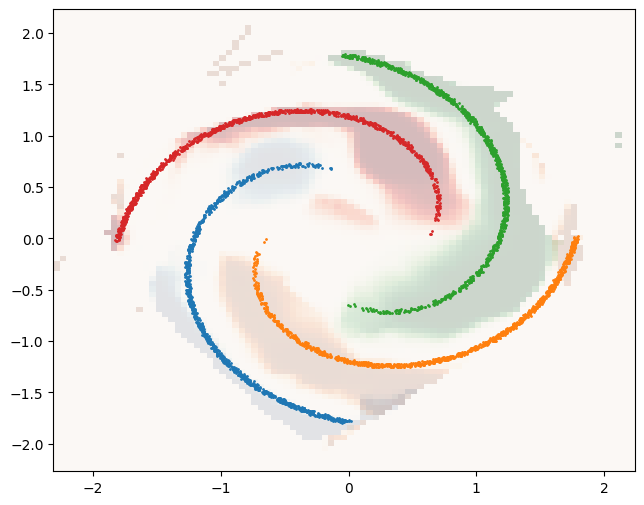

epoch: 111 - train loss: 0.00023, val loss: 0.00011, train err: 0.0072, val err: 0.0000, β: 9.2792, lr: 0.00010
epoch: 112 - train loss: 0.00023, val loss: 0.00011, train err: 0.0072, val err: 0.0000, β: 9.3538, lr: 0.00010
epoch: 113 - train loss: 0.00022, val loss: 0.00011, train err: 0.0067, val err: 0.0000, β: 9.4284, lr: 0.00010
epoch: 114 - train loss: 0.00022, val loss: 0.00011, train err: 0.0063, val err: 0.0000, β: 9.5031, lr: 0.00010
epoch: 115 - train loss: 0.00022, val loss: 0.00011, train err: 0.0056, val err: 0.0000, β: 9.5777, lr: 0.00010
epoch: 116 - train loss: 0.00022, val loss: 0.00011, train err: 0.0053, val err: 0.0000, β: 9.6523, lr: 0.00010
epoch: 117 - train loss: 0.00021, val loss: 0.00011, train err: 0.0051, val err: 0.0000, β: 9.7270, lr: 0.00010
epoch: 118 - train loss: 0.00021, val loss: 0.00011, train err: 0.0051, val err: 0.0000, β: 9.8016, lr: 0.00010
epoch: 119 - train loss: 0.00021, val loss: 0.00011, train err: 0.0051, val err: 0.0000, β: 9.8762, lr: 

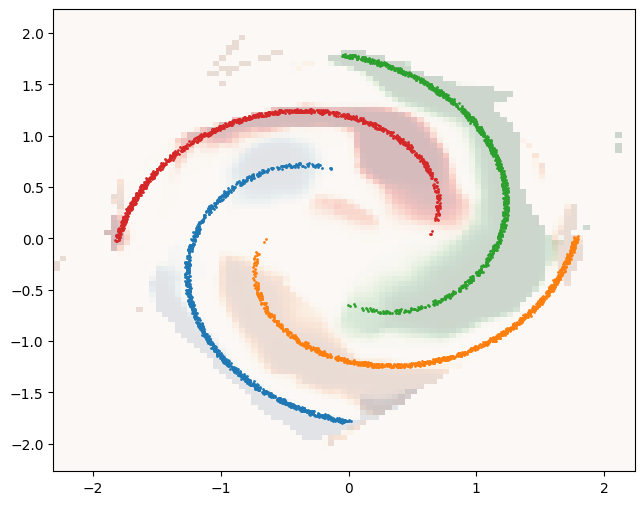

epoch: 121 - train loss: 0.00020, val loss: 0.00010, train err: 0.0042, val err: 0.0000, β: 10.0255, lr: 0.00010
epoch: 122 - train loss: 0.00020, val loss: 0.00010, train err: 0.0042, val err: 0.0000, β: 10.1001, lr: 0.00010
epoch: 123 - train loss: 0.00020, val loss: 0.00010, train err: 0.0037, val err: 0.0000, β: 10.1747, lr: 0.00010
epoch: 124 - train loss: 0.00020, val loss: 0.00010, train err: 0.0035, val err: 0.0000, β: 10.2493, lr: 0.00010
epoch: 125 - train loss: 0.00019, val loss: 0.00010, train err: 0.0035, val err: 0.0000, β: 10.3240, lr: 0.00010
epoch: 126 - train loss: 0.00019, val loss: 0.00010, train err: 0.0035, val err: 0.0000, β: 10.3986, lr: 0.00010
epoch: 127 - train loss: 0.00019, val loss: 0.00010, train err: 0.0032, val err: 0.0000, β: 10.4732, lr: 0.00010
epoch: 128 - train loss: 0.00019, val loss: 0.00010, train err: 0.0032, val err: 0.0000, β: 10.5478, lr: 0.00010
epoch: 129 - train loss: 0.00019, val loss: 0.00010, train err: 0.0030, val err: 0.0000, β: 10.6

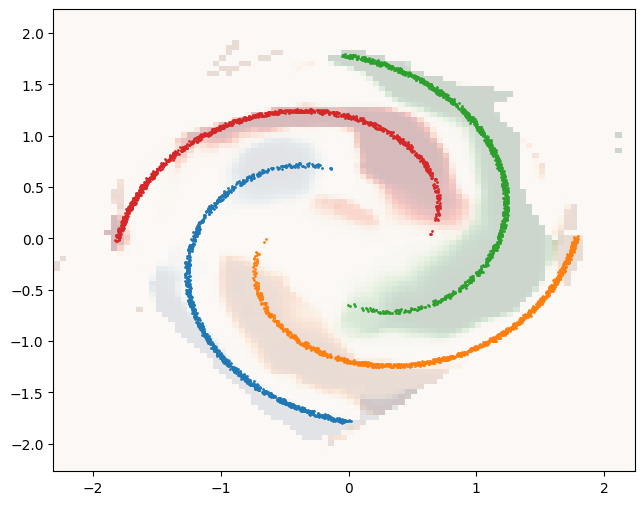

epoch: 131 - train loss: 0.00018, val loss: 0.00009, train err: 0.0028, val err: 0.0000, β: 10.7717, lr: 0.00010
epoch: 132 - train loss: 0.00018, val loss: 0.00009, train err: 0.0023, val err: 0.0000, β: 10.8464, lr: 0.00010
epoch: 133 - train loss: 0.00018, val loss: 0.00009, train err: 0.0023, val err: 0.0000, β: 10.9210, lr: 0.00010
epoch: 134 - train loss: 0.00018, val loss: 0.00009, train err: 0.0023, val err: 0.0000, β: 10.9956, lr: 0.00010
epoch: 135 - train loss: 0.00017, val loss: 0.00009, train err: 0.0023, val err: 0.0000, β: 11.0702, lr: 0.00010
epoch: 136 - train loss: 0.00017, val loss: 0.00009, train err: 0.0023, val err: 0.0000, β: 11.1449, lr: 0.00010
epoch: 137 - train loss: 0.00017, val loss: 0.00009, train err: 0.0021, val err: 0.0000, β: 11.2195, lr: 0.00010
epoch: 138 - train loss: 0.00017, val loss: 0.00009, train err: 0.0021, val err: 0.0000, β: 11.2941, lr: 0.00010
epoch: 139 - train loss: 0.00017, val loss: 0.00009, train err: 0.0019, val err: 0.0000, β: 11.3

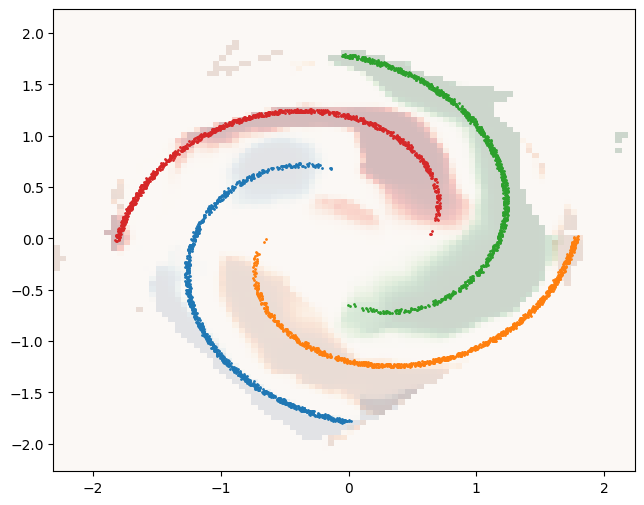

epoch: 141 - train loss: 0.00016, val loss: 0.00009, train err: 0.0016, val err: 0.0000, β: 11.5180, lr: 0.00010
epoch: 142 - train loss: 0.00016, val loss: 0.00009, train err: 0.0014, val err: 0.0000, β: 11.5926, lr: 0.00010
epoch: 143 - train loss: 0.00016, val loss: 0.00009, train err: 0.0012, val err: 0.0000, β: 11.6673, lr: 0.00010
epoch: 144 - train loss: 0.00016, val loss: 0.00008, train err: 0.0012, val err: 0.0000, β: 11.7419, lr: 0.00010
epoch: 145 - train loss: 0.00016, val loss: 0.00008, train err: 0.0012, val err: 0.0000, β: 11.8165, lr: 0.00010
epoch: 146 - train loss: 0.00016, val loss: 0.00008, train err: 0.0012, val err: 0.0000, β: 11.8911, lr: 0.00010
epoch: 147 - train loss: 0.00016, val loss: 0.00008, train err: 0.0012, val err: 0.0000, β: 11.9658, lr: 0.00010
epoch: 148 - train loss: 0.00015, val loss: 0.00008, train err: 0.0012, val err: 0.0000, β: 12.0404, lr: 0.00010
epoch: 149 - train loss: 0.00015, val loss: 0.00008, train err: 0.0012, val err: 0.0000, β: 12.1

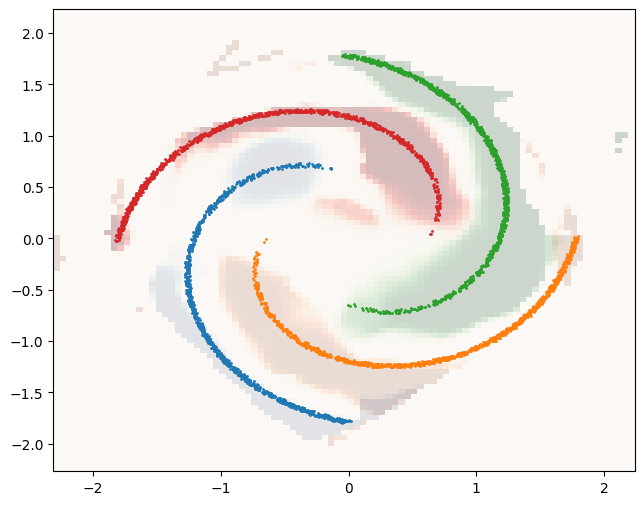

epoch: 151 - train loss: 0.00015, val loss: 0.00008, train err: 0.0012, val err: 0.0000, β: 12.2643, lr: 0.00010
epoch: 152 - train loss: 0.00015, val loss: 0.00008, train err: 0.0012, val err: 0.0000, β: 12.3389, lr: 0.00010
epoch: 153 - train loss: 0.00015, val loss: 0.00008, train err: 0.0012, val err: 0.0000, β: 12.4135, lr: 0.00010
epoch: 154 - train loss: 0.00015, val loss: 0.00008, train err: 0.0009, val err: 0.0000, β: 12.4881, lr: 0.00010
epoch: 155 - train loss: 0.00014, val loss: 0.00008, train err: 0.0009, val err: 0.0000, β: 12.5628, lr: 0.00010
epoch: 156 - train loss: 0.00014, val loss: 0.00008, train err: 0.0007, val err: 0.0000, β: 12.6374, lr: 0.00010
epoch: 157 - train loss: 0.00014, val loss: 0.00008, train err: 0.0007, val err: 0.0000, β: 12.7120, lr: 0.00010
epoch: 158 - train loss: 0.00014, val loss: 0.00008, train err: 0.0007, val err: 0.0000, β: 12.7867, lr: 0.00010
epoch: 159 - train loss: 0.00014, val loss: 0.00007, train err: 0.0007, val err: 0.0000, β: 12.8

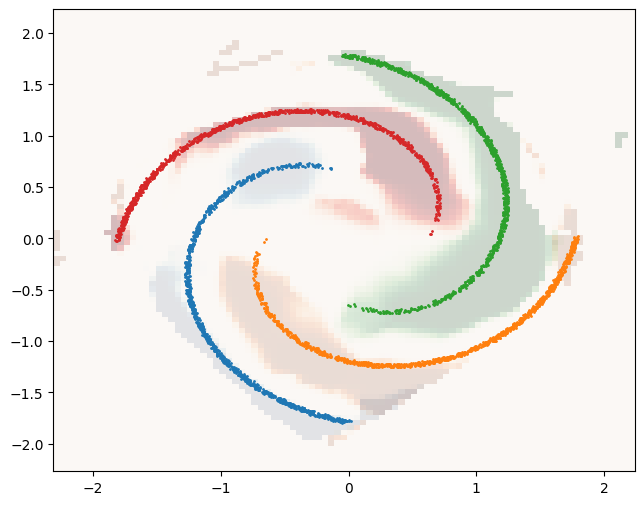

epoch: 161 - train loss: 0.00014, val loss: 0.00007, train err: 0.0005, val err: 0.0000, β: 13.0105, lr: 0.00010
epoch: 162 - train loss: 0.00014, val loss: 0.00007, train err: 0.0005, val err: 0.0000, β: 13.0852, lr: 0.00010
epoch: 163 - train loss: 0.00013, val loss: 0.00007, train err: 0.0005, val err: 0.0000, β: 13.1598, lr: 0.00010
epoch: 164 - train loss: 0.00013, val loss: 0.00007, train err: 0.0005, val err: 0.0000, β: 13.2344, lr: 0.00010
epoch: 165 - train loss: 0.00013, val loss: 0.00007, train err: 0.0005, val err: 0.0000, β: 13.3090, lr: 0.00010
epoch: 166 - train loss: 0.00013, val loss: 0.00007, train err: 0.0005, val err: 0.0000, β: 13.3837, lr: 0.00010
epoch: 167 - train loss: 0.00013, val loss: 0.00007, train err: 0.0005, val err: 0.0000, β: 13.4583, lr: 0.00010
epoch: 168 - train loss: 0.00013, val loss: 0.00007, train err: 0.0005, val err: 0.0000, β: 13.5329, lr: 0.00010
epoch: 169 - train loss: 0.00013, val loss: 0.00007, train err: 0.0005, val err: 0.0000, β: 13.6

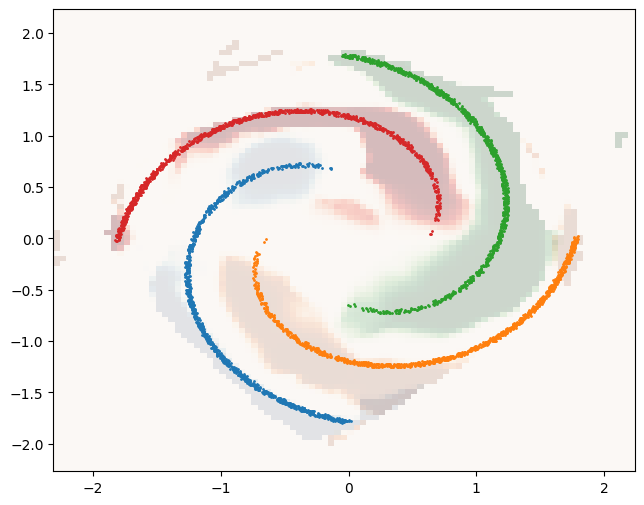

epoch: 171 - train loss: 0.00013, val loss: 0.00007, train err: 0.0005, val err: 0.0000, β: 13.7568, lr: 0.00010
epoch: 172 - train loss: 0.00012, val loss: 0.00007, train err: 0.0005, val err: 0.0000, β: 13.8314, lr: 0.00010
epoch: 173 - train loss: 0.00012, val loss: 0.00007, train err: 0.0005, val err: 0.0000, β: 13.9061, lr: 0.00010
epoch: 174 - train loss: 0.00012, val loss: 0.00006, train err: 0.0005, val err: 0.0000, β: 13.9807, lr: 0.00010
epoch: 175 - train loss: 0.00012, val loss: 0.00006, train err: 0.0005, val err: 0.0000, β: 14.0553, lr: 0.00010
epoch: 176 - train loss: 0.00012, val loss: 0.00006, train err: 0.0005, val err: 0.0000, β: 14.1299, lr: 0.00010
epoch: 177 - train loss: 0.00012, val loss: 0.00006, train err: 0.0005, val err: 0.0000, β: 14.2046, lr: 0.00010
epoch: 178 - train loss: 0.00012, val loss: 0.00006, train err: 0.0005, val err: 0.0000, β: 14.2792, lr: 0.00010
epoch: 179 - train loss: 0.00012, val loss: 0.00006, train err: 0.0005, val err: 0.0000, β: 14.3

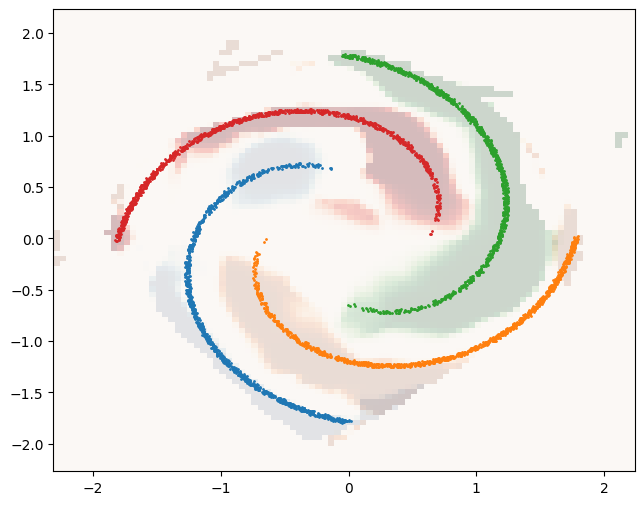

Best val_err
epoch: 181 - train loss: 0.00012, val loss: 0.00006, train err: 0.0005, val err: 0.0000, β: 14.5031, lr: 0.00010
Best val_err
epoch: 182 - train loss: 0.00011, val loss: 0.00006, train err: 0.0005, val err: 0.0000, β: 14.5777, lr: 0.00010
Best val_err
epoch: 183 - train loss: 0.00011, val loss: 0.00006, train err: 0.0005, val err: 0.0000, β: 14.6523, lr: 0.00010
Best val_err
epoch: 184 - train loss: 0.00011, val loss: 0.00006, train err: 0.0005, val err: 0.0000, β: 14.7270, lr: 0.00010
Best val_err
epoch: 185 - train loss: 0.00011, val loss: 0.00006, train err: 0.0005, val err: 0.0000, β: 14.8016, lr: 0.00010
Best val_err
epoch: 186 - train loss: 0.00011, val loss: 0.00006, train err: 0.0005, val err: 0.0000, β: 14.8762, lr: 0.00010
Best val_err
epoch: 187 - train loss: 0.00011, val loss: 0.00006, train err: 0.0005, val err: 0.0000, β: 14.9508, lr: 0.00010
Best val_err
epoch: 188 - train loss: 0.00011, val loss: 0.00006, train err: 0.0005, val err: 0.0000, β: 15.0255, lr: 

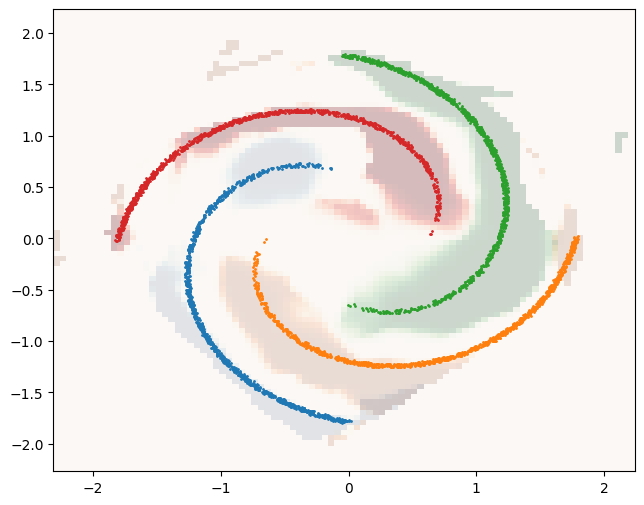

Best val_err
epoch: 191 - train loss: 0.00011, val loss: 0.00005, train err: 0.0002, val err: 0.0000, β: 15.2493, lr: 0.00010
Best val_err
epoch: 192 - train loss: 0.00010, val loss: 0.00005, train err: 0.0002, val err: 0.0000, β: 15.3240, lr: 0.00010
Best val_err
epoch: 193 - train loss: 0.00010, val loss: 0.00005, train err: 0.0002, val err: 0.0000, β: 15.3986, lr: 0.00010
Best val_err
epoch: 194 - train loss: 0.00010, val loss: 0.00005, train err: 0.0002, val err: 0.0000, β: 15.4732, lr: 0.00010
Best val_err
epoch: 195 - train loss: 0.00010, val loss: 0.00005, train err: 0.0002, val err: 0.0000, β: 15.5478, lr: 0.00010
Best val_err
epoch: 196 - train loss: 0.00010, val loss: 0.00005, train err: 0.0002, val err: 0.0000, β: 15.6225, lr: 0.00010
Best val_err
epoch: 197 - train loss: 0.00010, val loss: 0.00005, train err: 0.0002, val err: 0.0000, β: 15.6971, lr: 0.00010
Best val_err
epoch: 198 - train loss: 0.00010, val loss: 0.00005, train err: 0.0002, val err: 0.0000, β: 15.7717, lr: 

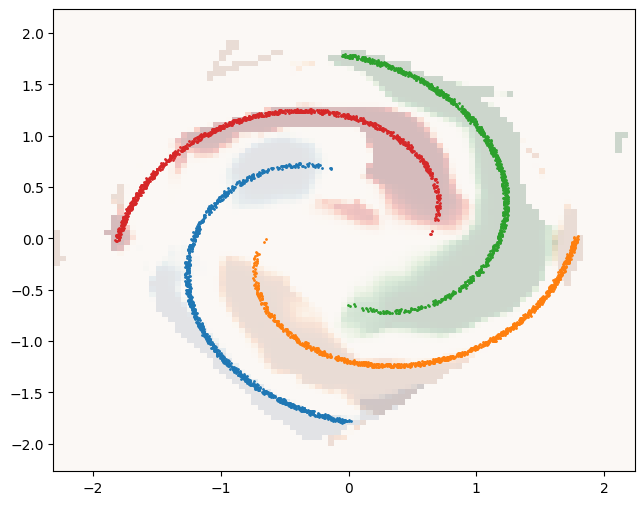

Best val_err
epoch: 201 - train loss: 0.00010, val loss: 0.00005, train err: 0.0002, val err: 0.0000, β: 15.9956, lr: 0.00010
Best val_err


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/err,█▃▂▂▁▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/loss,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val/err,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val/loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
β,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
best_epoch,201
best_val_err,0.0
epoch,201
learning_rate,0.0001


In [18]:
state, best_state = train_loop(
    model, state, config, rng, make_loss, make_loss, train_loader, val_loader,
    # test_loader,
    wandb_kwargs={
        'mode': 'online',
        # 'notes': '',
    },
    plot_fn=make_plots
)

## Paper plot

In [19]:
text_width = 6.75133 # in  --> Confirmed with template explanation
line_width = 3.25063
dpi = 200

fs_m1 = 7  # for figure ticks
fs = 8  # for regular figure text
fs_p1 = 9 #  figure titles

matplotlib.rc('font', size=fs)          # controls default text sizes
matplotlib.rc('axes', titlesize=fs)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=fs)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=fs_m1)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=fs_m1)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=fs_m1)    # legend fontsize
matplotlib.rc('figure', titlesize=fs_p1)  # fontsize of the figure title


matplotlib.rc('font', **{'family':'serif', 'serif': ['Palatino']})
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

/tmp/ipykernel_23586/2891865125.py:20: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]


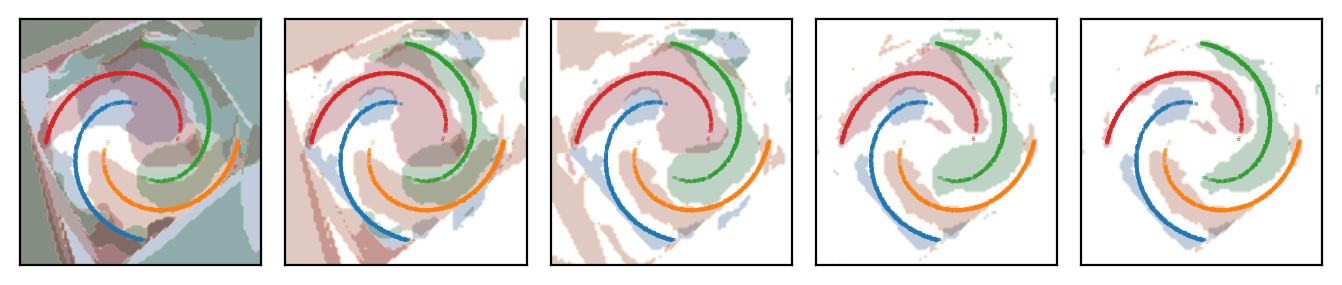

In [20]:
fig, axs = plt.subplots(1, 5, figsize=(text_width, text_width/4.6), dpi=dpi, sharey=True, sharex=True, layout='tight')

hard_ovr_params, hard_ovr_model_state = best_state.params, best_state.model_state

n_class = int(y_train.max()) + 1

# hard_ovr preds
h = .05  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X_train[:, 0].min() * 1.25, X_train[:, 0].max() * 1.25
y_min, y_max = X_train[:, 1].min() * 1.25, X_train[:, 1].max() * 1.25
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
xs = np.c_[xx.ravel(), yy.ravel()]

pred_fun = partial(
    model.apply,
    {"params": hard_ovr_params, **hard_ovr_model_state},
    train=False, return_ens_preds=True, β=best_state.β, hard_pred = True,
    method=model.pred
)

_, ens_preds = jax.vmap(
    pred_fun, out_axes=(0, 1), in_axes=(0,), axis_name="batch"
)(xs)



colormaps = ['Blues', 'Oranges', 'Greens', 'Reds', 'Purples']

for j in range(ens_preds.shape[0]):
    preds = ens_preds[:j+1].prod(axis=0)

    for i in range(n_class):
        f = preds[:, i].reshape(xx.shape)
        step = 0.05
        max = np.amax(f)
        min = np.amin(f)
        levels = np.arange(min, max, step) + step
        axs[j].contourf(xx, yy, f, levels, alpha=0.25, cmap=colormaps[i], antialiased=True)

    # for i in range(depth + 1):
    #     axs[j].contour(xx, yy, ens_preds[:, i, 0].reshape(xx.shape), cmap=plt.cm.gray, levels=[.5], alpha=0.3)

    markers = ['o', 'v', 's', 'P', 'X']
    for i in range(n_class):
        idxs = (y_train == i)
        axs[j].plot(X_train[idxs, 0], X_train[idxs, 1], markers[0], c=f'C{i}', alpha=1, ms=0.1)
    axs[j].tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

plt.savefig('spiral_evolution.pdf', dpi=dpi, bbox_inches='tight')    